# PACIENTI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from csv import DictReader

In [228]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_exp = dict()
data_info = dict()

for row in reader:
    data_exp[row["Gene ID"]] = []
    for key, value in row.items():
        if key != "Gene ID" and key != "Gene Name":
            data_exp[row["Gene ID"]] += [float(value)]
            

fd = open("PR_pacienti2_opis.csv", "rt", encoding="utf-8")
reader = DictReader(fd)

for row in reader:
    data_info[row["Run"]] = dict()
    data_info[row["Run"]]["age"] = int(row["Sample Characteristic[age]"][:2])
    data_info[row["Run"]]["smoke"] = row["Sample Characteristic[clinical information]"]
    data_info[row["Run"]]["person"] = row["Sample Characteristic[individual]"]
    data_info[row["Run"]]["tissue"] = row["Sample Characteristic[sampling site]"]
    data_info[row["Run"]]["gender"] = row["Sample Characteristic[sex]"]
        

In [116]:
fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

data_imenaGenov= dict()

for row in reader:
    data_imenaGenov[row["Gene ID"]] = row["Gene Name"]
data_imenaGenov

{'ENSG00000000003': 'TSPAN6',
 'ENSG00000000005': 'TNMD',
 'ENSG00000000419': 'DPM1',
 'ENSG00000000457': 'SCYL3',
 'ENSG00000000460': 'C1orf112',
 'ENSG00000000938': 'FGR',
 'ENSG00000000971': 'CFH',
 'ENSG00000001036': 'FUCA2',
 'ENSG00000001084': 'GCLC',
 'ENSG00000001167': 'NFYA',
 'ENSG00000001460': 'STPG1',
 'ENSG00000001461': 'NIPAL3',
 'ENSG00000001497': 'LAS1L',
 'ENSG00000001561': 'ENPP4',
 'ENSG00000001617': 'SEMA3F',
 'ENSG00000001626': 'CFTR',
 'ENSG00000001629': 'ANKIB1',
 'ENSG00000001630': 'CYP51A1',
 'ENSG00000001631': 'KRIT1',
 'ENSG00000002016': 'RAD52',
 'ENSG00000002079': 'MYH16',
 'ENSG00000002330': 'BAD',
 'ENSG00000002549': 'LAP3',
 'ENSG00000002586': 'CD99',
 'ENSG00000002587': 'HS3ST1',
 'ENSG00000002726': 'AOC1',
 'ENSG00000002745': 'WNT16',
 'ENSG00000002746': 'HECW1',
 'ENSG00000002822': 'MAD1L1',
 'ENSG00000002834': 'LASP1',
 'ENSG00000002919': 'SNX11',
 'ENSG00000002933': 'TMEM176A',
 'ENSG00000003056': 'M6PR',
 'ENSG00000003096': 'KLHL13',
 'ENSG00000003

In [9]:
fs = open("testfile1.csv", "rt")
reader = DictReader(fs)

data_stat = dict()

for row in reader:
    data_stat[row["geneId"]] = row["lung"]

data_stat_keys = set()
for key in data_stat:
    data_stat_keys.add(key)

In [13]:
data_presek = dict() #podatki za vse gene, ki so v obeh setih podatkov
for key, value in data_exp.items():
    if key in data_stat_keys:
        data_presek[key] = value
len(data_presek)

19503

**NE POGANJAJ -> traja ... -> rezultati so v datoteki GeniMatrika**

In [ ]:
"""matrika = np.empty((0,670), dtype = float)

for key, value in data_presek.items():
    matrika = np.vstack((matrika, value))"""

In [19]:
data_geni = []
data_runs = []
for key in data_presek:
    data_geni += [key]

fp = open("PR_pacienti2.csv", "rt", encoding="utf-8")
reader = DictReader(fp)

for row in reader:
    for key in row:
        if key != "Gene ID" and key != "Gene Name":
            data_runs += [key]
    break

In [92]:
import pandas as pd

In [107]:
# Zapis generirane matrike

"""matrika_izpis = matrika
matrika_izpis = np.array(matrika_izpis, dtype = str)

headers = data_runs
levo = data_geni
df = pd.DataFrame(matrika_izpis, columns=headers, index=levo)
df.to_csv("GeniMatrika.csv")"""

In [108]:
matrika_whole = np.loadtxt('GeniMatrika.csv', delimiter=",", skiprows=1, dtype = str)
matrika_whole

array([['ENSG00000000003', '3330.0', '3018.0', ..., '66.0', '310.0',
        '331.0'],
       ['ENSG00000000005', '9.0', '0.0', ..., '0.0', '2.0', '0.0'],
       ['ENSG00000000419', '1202.0', '1587.0', ..., '118.0', '568.0',
        '615.0'],
       ...,
       ['ENSG00000281613', '0.0', '0.0', ..., '0.0', '0.0', '0.0'],
       ['ENSG00000281887', '0.0', '0.0', ..., '1.0', '0.0', '0.0'],
       ['ENSG00000281899', '0.0', '0.0', ..., '0.0', '0.0', '0.0']],
      dtype='<U15')

**METODA maska** se uporablja s spodajnavedenimi argumenti

In [232]:
#OMEJITVE
AGE_MIN = 0
AGE_MAX = 0
SMOKER = True #"smoker" / "ex-smoker" / "non-smoker"
PERSON = True #L400 - L881
TISSUE = True #"tumor tissue" / "non-malignant tissue"
GENDER = True #"male" / "female"


def isAge(run, AGE_MIN, AGE_MAX):
    run_age = int(data_info[run]["age"])
    return(AGE_MIN<=run_age and AGE_MAX>=run_age)

def isSmoker(run, SMOKER):
    return(data_info[run]["smoke"] == SMOKER or SMOKER == True)

def isPerson(run, PERSON):
    return(data_info[run]["person"] == PERSON or PERSON == True)
    
def isTissue(run, TISSUE):
    return(data_info[run]["tissue"] == TISSUE or TISSUE == True)

def isGender(run, GENDER):
    return(data_info[run]["gender"] == GENDER or GENDER == True)

def isALL(run, AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER):
    return(isAge(run, AGE_MIN, AGE_MAX) and isSmoker(run, SMOKER) and isPerson(run, PERSON) and
           isTissue(run, TISSUE) and isGender(run, GENDER))

def maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True):
    pacient_bool = np.full((1,len(pacienti)), True, dtype = bool)[0]
    for i in range(len(pacienti)):
        pacient_bool[i] = isALL(pacienti[i], AGE_MIN, AGE_MAX, SMOKER, PERSON, TISSUE, GENDER)
    return pacient_bool

def uporabiMasko(matrika, maska):
    matrika_p = matrika
    matrika_p = np.transpose(matrika_p)
    matrika_p = matrika_p[maska, :]
    return np.transpose(matrika_p)

In [80]:
matrika_lung = []
for key in data_presek:
    matrika_lung += [float(data_stat[key])]

**OBDELVAVA PODATKOV**

In [113]:
gn = open("VTSGgeni.csv", "rt")
reader = DictReader(gn)
geni5plus = []

for row in reader:
    geni5plus += [row["geneName"]]
geni5plus = set(geni5plus)

In [119]:
geni_bool = np.full((1,19503), False, dtype=bool)[0]

for i in range(len(matrika_whole)):
    if data_imenaGenov[matrika_whole[i][0]] in geni5plus:
        geni_bool[i] = True
geni_bool

array([ True, False,  True, ..., False,  True, False])

In [125]:
matrika = matrika_whole[geni_bool, 1:]
matrika = np.array(matrika, dtype = float)
data_geni_red = matrika_whole[geni_bool, :1]

In [127]:
matrika.shape

(11469, 670)

In [128]:
matrika_norm = np.zeros((matrika.shape[0], matrika.shape[1]), dtype = float)

for i in range(len(matrika_norm)):
    for j in range(len(matrika_norm[i])):
        if matrika_lung[i]>0:
            matrika_norm[i][j] = matrika[i][j]/matrika_lung[i]
        else:
            matrika_norm[i][j] = 0.0

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

## ANALIZE PODATKOV

Tu se začnejo prave analize --> Spodaj naveden primer, kako jih delati.

Uporabljali bomo navadno matriko: **matrika** (stolpci pacienti, vrstice ekspresije genov)

Uporabljamo lahko tudi normalizirano matriko: **matrika_norm** (stolpci pacienti, vrstice ekspresije genov) - bolj primerna je normalizacija glede na kontrolno skupino pacientov.

Za reduciranje so atributih pacientov se uporablja maska: 

    maska(pacienti = data_runs, AGE_MIN=0, AGE_MAX=100, SMOKER =True, PERSON=True, TISSUE=True, GENDER=True)
    
Karkoli ni **True** moraš navesti, kaj želiš gledat. Možnosti so navedene pri sami definiciji.

Če uporabljata matriko_norm, jo najprej prepišita v novo spremenljivko, da ne bomo izgubljali podatkov zaradi bedarij.

Analize označujta z zaporedno številko in dovolj opisnim imenom (npr. **0. Analiza ekspresije genov glede na spol**)

**matrika_norm** je matrika normaliziranih vrednosti glede na povprečno ekspresijo v pljučnem tkivu.
Vrednost 1 pomeni normalno, >1 povišano ekspresijo, <1 znižano ekspresijo

### 0. Analiza ekspresije genov glede na spol

**Prepis podatkov in začetne inicializaicije**

In [146]:
matrika_spol = matrika

#Uporabim masko za ženski spol
mask = maska(GENDER="female")
matrika_zenske = uporabiMasko(matrika_spol, mask) #Lahko uporabiš tudi ročno -> pazi da transponiraš

#Uporabim masko za moški spol
mask = maska(GENDER = "male")
matrika_moski = uporabiMasko(matrika_spol, mask)

In [147]:
matrika_moski.shape, matrika_zenske.shape #Moški so bolj in shape (this is a joke)

((11469, 319), (11469, 351))

**Primerjava ekspresije pri ženskah**

In [149]:
#Dve matriki -> ženske z rakom, ženske brez raka(kontrola)
matrika_zenske_tumor = uporabiMasko(matrika_spol, maska(GENDER = "female", TISSUE = "tumor tissue"))
matrika_zenske_normal = uporabiMasko(matrika_spol, maska(GENDER = "female", TISSUE = "non-malignant tissue"))

In [220]:
matrika_zenske_tumor.shape

(11469, 325)

In [171]:
#Poglejmo variance v ekspresiji genov za vsak gen

#ŽENSKE S TUMORJEM
zenske_tumor_var = []

for i in range(len(matrika_zenske_tumor)):
    zenske_tumor_var += [np.var(matrika_zenske_tumor[i])/np.mean(matrika_zenske_tumor[i])]

#ŽENSKE BREZ TUMORJA
zenske_normal_var = []

for i in range(len(matrika_zenske_normal)):
    zenske_normal_var += [np.var(matrika_zenske_normal[i]/np.mean(matrika_zenske_normal[i]))]

zenske_normal_var

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


[1.713391007178404,
 1.4463163406276274,
 1.6343983219194345,
 1.9002593543510276,
 1.4500588216877193,
 1.910492644610894,
 1.7295401961491992,
 1.4301691434556576,
 1.410929185081599,
 1.9100471561703856,
 1.5233774086352396,
 2.7519667422088143,
 1.6988416219899443,
 2.0252609770957277,
 1.9228325189796982,
 2.2465788876577544,
 2.6506775990581044,
 1.5274382184704445,
 1.9889448797264921,
 2.0688943349780526,
 1.8813539292210413,
 1.5205314653994806,
 1.8108454544991313,
 1.3946042064157957,
 2.8318425760286225,
 3.1487894414983435,
 1.855775698949337,
 2.458174088638538,
 1.6300361171594024,
 1.7880715853170275,
 1.803336038533149,
 1.653850670076807,
 1.9652866605744987,
 2.1983275379336362,
 2.0890452230385486,
 2.0803710924965007,
 1.54237229124181,
 2.272427389266816,
 1.5613480132512128,
 1.6687773409054965,
 1.3391237062570318,
 1.744466972043922,
 2.9499073683082715,
 2.0306964174786435,
 1.8166714251250238,
 1.5621780298152041,
 3.9606602396843895,
 1.7618119830366852,
 4.

Varijanco sem normaliziral glede na povprečno ekspresijo gena v tkivu -> dobimo tak graf

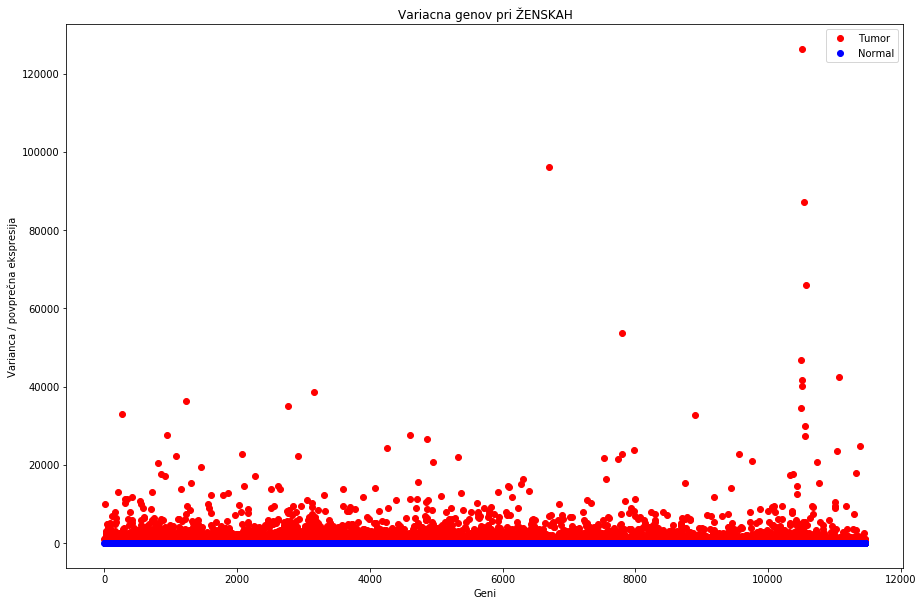

In [175]:
#GREMO NARISAT VARIANCE --> Prosim označujta grafe in legende in tako dalje...

plt.figure(figsize=(15,10))
plt.plot(zenske_tumor_var, "ro", label = "Tumor")
plt.plot(zenske_normal_var, "bo", label = "Normal")
plt.xlabel("Geni")
plt.ylabel("Varianca / povprečna ekspresija")
plt.title("Variacna genov pri ŽENSKAH")
plt.legend()
plt.show()

Vidimo, da se ravnovesje varianc poruši, kar je značilno za rakava tkiva.

Ideja za naprej: GRUČENJE PACIENTOV -> Ali se dajo ustriti skupine razičnih rakov pri ženskah?

Vidimo, da se pri noramlnem tkivu ne spreminja zelo veliko (var/povpr ~ 0). Lahko naredimo normalizacijo po povprečju kontrole in izvedemo gručenje glede na njih.

In [180]:
#NORMALIZACIJA NA KONTROLNO TKIVO

zenske_tumor_norm = np.zeros(matrika_zenske_tumor.shape)

for i in range(len(matrika_zenske_tumor)):
    povp = np.mean(matrika_zenske_normal[i])
    for j in range(len(matrika_zenske_tumor[i])):
        if povp == 0:
            zenske_tumor_norm[i][j] = matrika_zenske_tumor[i][j]/0.1
        else:
            zenske_tumor_norm[i][j] = matrika_zenske_tumor[i][j]/povp

zenske_tumor_norm

array([[ 6.57072797, 10.89808429,  6.26390805, ...,  4.96888889,
         2.49042146,  8.37578544],
       [ 3.62616408,  4.34966741,  5.0443459 , ...,  3.10443459,
         2.90266075,  2.25121951],
       [ 5.35836177,  3.57337884,  2.59044369, ...,  3.27645051,
         2.53924915,  1.44368601],
       ...,
       [ 5.59625668,  6.53475936,  2.5026738 , ...,  9.73262032,
         3.71925134,  2.9197861 ],
       [ 2.44081633,  1.80408163,  1.91020408, ...,  1.11428571,
         2.1755102 ,  0.63673469],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

**POSKUSIMO IZVESTI HIERARHIČNO GRUČENJE**

In [86]:
import scipy.cluster.hierarchy as sch
import scipy

In [93]:
# NE POZABI TRANSPONIRAT MATRIKE
matrika_dendrogram = np.transpose(zenske_tumor_norm)
matrika_dendrogram.shape

(325, 11469)

Ker je velika matrika potrebuje tut metoda velik časa

In [96]:
L = sch.linkage(matrika_dendrogram, method="ward", metric="euclidean") #metric & method bo treba optimizirat

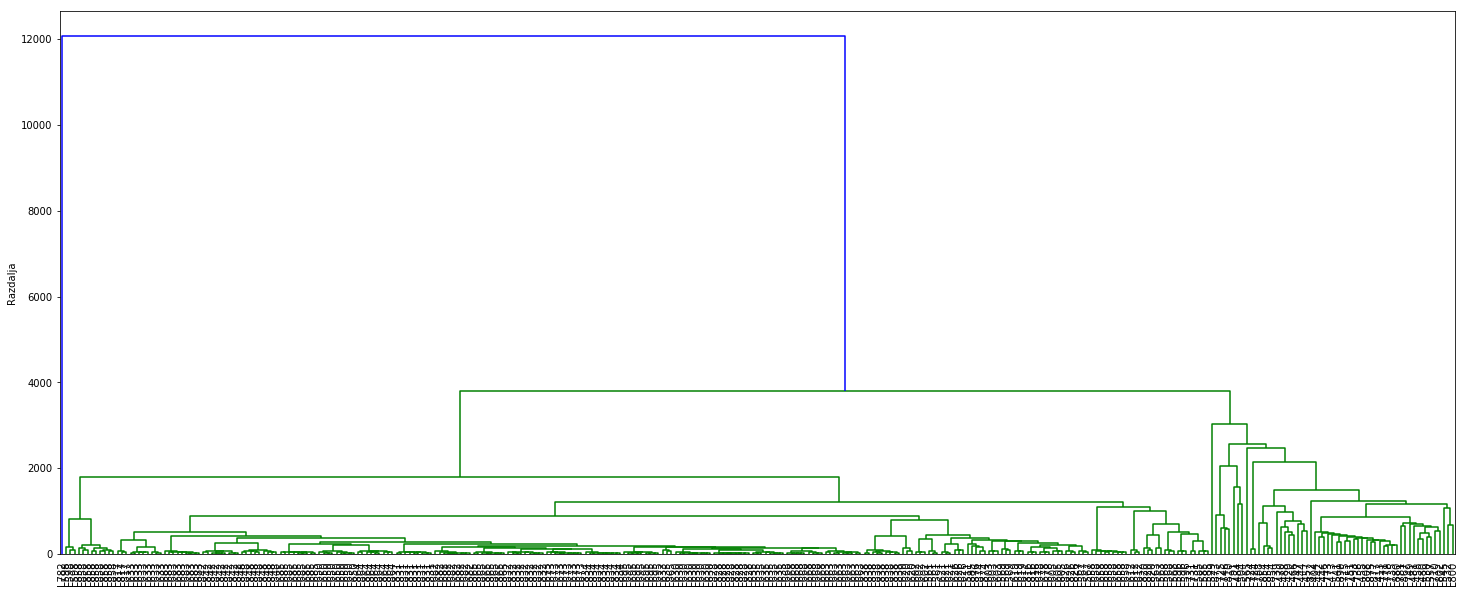

In [99]:
plt.figure(figsize=(25, 10))
runs = np.array(data_runs)[maska(GENDER = "female", TISSUE = "tumor tissue")]
labels = [data_info[x]["person"] for x in runs] #IZPISE KDO JE KADILEC --> (spreminjaj napis za ostale stvari)
D      = sch.dendrogram(L, labels = labels, leaf_font_size=10)
plt.ylabel("Razdalja")
plt.show()

Tole ima večjo smiselnost! --> Izgledata kot dve različni obliki raka (morda več - 3,4,5?). Morda pričakujemo pri moškem enako.

Vidimo, da ima rdeča skupina **samo 3 nekadilce** in ostalo kadilci! --> note the fact

**Obliko bi se dalo napovedovati! --> Razmisli o klasifikatorju?**

**KMeans**

In [29]:
from scipy.cluster.vq import vq, kmeans, whiten

In [36]:
class KMeans:
    
    def __init__(self, k=10, max_iter=100):
        """
        Initialize KMeans clustering model.
        
        :param k
            Number of clusters.
        :param max_iter
            Maximum number of iterations.
        """
        self.k         = k
        self.max_iter  = max_iter    
    
    def fit(self, X):
        """
        Fit the Kmeans model to data.
        
        :param X
            Numpy array of shape (n, p)
            n: number of data examples
            p: number of features (attributes)
        
        :return 
            labels: array of shape (n, ), cluster labels (0..k-1)
            centers: array of shape (p, )
        """
        
        n, p    = X.shape
        labels  = np.random.choice(range(self.k), size=n, replace=True)
        centers = np.random.rand(self.k, p)
        
        ### Your code here ###
        centers = np.min(X, axis=0) + centers * (np.max(X, axis=0) - np.min(X, axis=0)) 
        
        i = 0
        while i < self.max_iter:
            
            # Find nearest cluster
            for j, x in enumerate(X):
                ki = np.argmin(np.sum((centers - x) ** 2, axis=1))
                labels[j] = ki
                
            # Move centroid
            for ki in range(self.k):
                centers[ki] = X[labels == ki].mean(axis=0)    
            i += 1
        
        ### Your code here ###
        return labels, centers

In [92]:
zenske_tumor_norm = np.transpose(zenske_tumor_norm)
zenske_tumor_norm.shape

(11469, 325)

**KMeans - model**

In [112]:
#Odstranimo run SRR3475112
indeksRun = data_runs.index("SRR3475112")
matr = matrika
matr = np.transpose(matr)
matr = np.vstack((matr[:indeksRun,:], matr[indeksRun+1: , :]))
matr_zenske = uporabiMasko(matrika_spol, maska(GENDER = "female", TISSUE = "tumor tissue"))
matr_zenske.shape

(11469, 325)

In [113]:
#NORMALIZACIJA NA KONTROLNO TKIVO

zenske_tumor_norm = np.zeros(matr_zenske.shape)

for i in range(len(matr_zenske)):
    povp = np.mean(matrika_zenske_normal[i])
    for j in range(len(matr_zenske[i])):
        if povp == 0:
            zenske_tumor_norm[i][j] = matr_zenske[i][j]/0.1
        else:
            zenske_tumor_norm[i][j] = matr_zenske[i][j]/povp

zenske_tumor_norm

array([[ 6.57072797, 10.89808429,  6.26390805, ...,  4.96888889,
         2.49042146,  8.37578544],
       [ 3.62616408,  4.34966741,  5.0443459 , ...,  3.10443459,
         2.90266075,  2.25121951],
       [ 5.35836177,  3.57337884,  2.59044369, ...,  3.27645051,
         2.53924915,  1.44368601],
       ...,
       [ 5.59625668,  6.53475936,  2.5026738 , ...,  9.73262032,
         3.71925134,  2.9197861 ],
       [ 2.44081633,  1.80408163,  1.91020408, ...,  1.11428571,
         2.1755102 ,  0.63673469],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [115]:
model = KMeans(k=3, max_iter=20)

labels, centers = model.fit(zenske_tumor_norm)

plt.figure(figsize=(10, 10))
color = {0:"red", 1:"blue", 2:"yellow"}

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: Mean of empty slice.
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:78: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [116]:
razlika_center = []
for i in range(len(centers[0])):
    razlika_center += [abs(centers[0][i] -centers[1][i])]
    
center_a = razlika_center.index(max(razlika_center))
centers

array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,     

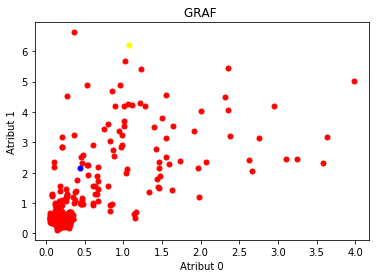

In [79]:
for c, x in zip(labels, zenske_tumor_norm[:, 202:204]):
    plt.plot(x[0], x[1], ".", color=color[c], markersize=10.0)
plt.title("GRAF ")
plt.xlabel("Atribut 0")
plt.ylabel("Atribut 1")
plt.show()

In [65]:
zenske_tumor_norm.shape

(325, 11469)

In [66]:
variance = np.var(zenske_tumor_norm)
variance

31.680979030243947

### NADALJNE IDEJE IN STVARI KI JIH BOMO IZVEDLI

Nekaj idej za pregledat:
- Analiza za moške (enak način kot zgoraj)
- Analiza po letih (ekspresije genov, ki se nabolj spreminjajo s starostjo, itd.)
- Analiza kadilec/bivši-kadilec/nekadilec (ekspresije genov, ki so različne, itd.)
    - povezava gen - kadilec?
- Iskanje gruč -> različne oblike rakov (NMF napovedni model oz. nek klasifikator - drevo?)  -->> MARTIN
- po želji -> vstavi svojo idejo

Napišem še kakšno idejo, ko se jo spomnim.

Idejo napiši v discord, da razmislim ali je izvedljiva/smiselna. Upoštevajta zgoraj navedene smernice (Številčenje, doslednost, opis stvari -> da bom znal za vama brat in izvlečt rezultate.)

Naj bodo stvari grafično lepe, vse oznake stranic, naslovi itd.

Srečno :)